<a href="https://colab.research.google.com/github/miguel-mb-cell/Dimensionalidade-de-Imagens/blob/main/Redu%C3%A7%C3%A3o_de_Dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O que √© Redu√ß√£o de Dimensionalidade

Dentro de Machine Learning, esse √© o processo de reduzir o n√∫mero de vari√°veis desnecess√°rias que ser√£o inseridas em um modelo para treino, o que reduz a dimens√£o do conjunto de dados, mas preserva a ess√™ncia dos dados originais.

Para isso, √© necess√°rio identificar quais s√£o as vari√°veis principais, que s√£o aquelas que possuem informa√ß√µes √∫nicas, sem forte correla√ß√£o com outras vari√°veis.

Por exemplo, uma vari√°vel que representa a data de nasicmento de uma pessoa e uma que representa a idade dela. N√£o √© necess√°rio gastar mem√≥ria para as duas vari√°veis, j√° que a partir de uma, √© poss√≠vel obter a outra. Essas vari√°veis correlacionadas s√£o redundantes e podem ser eliminadas.

Dessa forma apenas informa√ß√£o essencial √© mantida, reduzindo a quantidade de dados e otimizando o processamento.

Em 1957 o matem√°tico americano Richard E. Bellman cunhou o termo "The Curse of Dimensionality". Ele usou esse termo para descrever os problemas que surgem quando se adiciona mais dimens√µes a um espa√ßo euclidiano.

Esse problemas tamb√©m ocorrem no contexto de ML, quando o n√∫mero de features aumenta, o n√∫mero de amostras precisa aumentar tamb√©m para que o n√∫mero de combina√ß√µes entre features e classes seja satisfat√≥rio. Isso faz com que o modelo fique cada vez mais complexo. Al√©m disso, quanto maior o n√∫mero de features, menos o modelo vai conseguir generalizar e maior a chance de ocorrer overfitting.

A redu√ß√£o de dimensionalidade √© capaz de simplificar modelos, reduzir o tempo de treino e reduzir o overfitting.

No Scikit-Learn temos tr√™s t√©cnicas para redu√ß√£o de dimensionalidade: principal component analysis (PCA), LinearDiscriminantAnalysis (LDA), e Isomap.

Vamos ver como aplicar filtros para pr√©-processar as imagens e facilitar a sua redu√ß√£o de dimensionalidade.

Existem t√©cnicas complexas para a redu√ß√£o de dimensionalidade em outros conjuntos de dados, mas nesse estudo, veremos como a simples aplica√ß√£o de filtros pode reduzir as dimens√µes de uma imagem.

## Carregar imagem da internet
Primeiro vamos definir as fun√ß√µes para que possamos carregar uma imagem da internet e v√™-la.

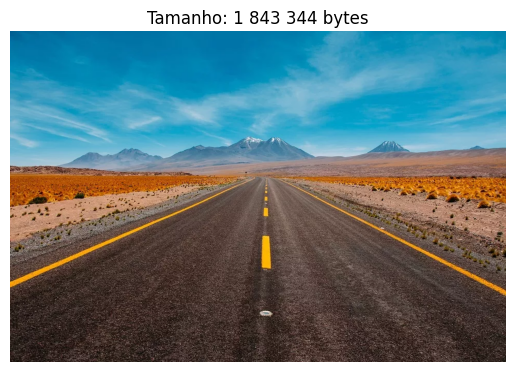

In [1]:
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import sys

def load_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert('RGB')
    return np.array(image)

def format_bytes(size):
    return '{:,}'.format(size).replace(',', ' ')

def show_image(image_array):
    plt.imshow(image_array, cmap='gray')
    size = sys.getsizeof(image_array)
    formatted_size = format_bytes(size)
    plt.title(f'Tamanho: {formatted_size} bytes')
    plt.axis('off')  # Remove os eixos para uma visualiza√ß√£o mais limpa
    plt.show()

image_url = 'https://www.dotefl.com/wp-content/uploads/2023/07/Road-vs-street.jpg'
imagem_carregada = load_image(image_url)
show_image(imagem_carregada)

## Filtro de Tons de Cinza

Para converter uma imagem em tons de cinza, voc√™ pode calcular a m√©dia ponderada dos valores dos canais de cor (vermelho, verde e azul). Uma f√≥rmula comum para essa convers√£o √©:

>$Cinza=0.299‚ãÖùëÖ+0.587‚ãÖùê∫+0.114‚ãÖùêµ$


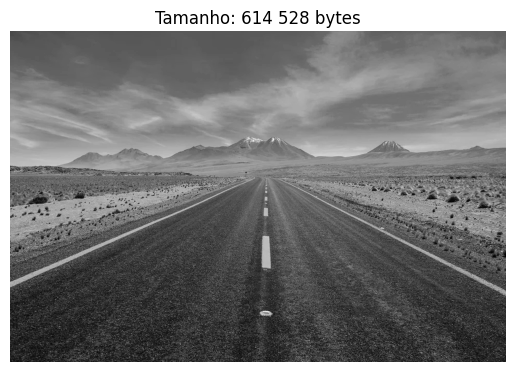

In [2]:
def convert_to_grayscale(image):
    # Carregar a imagem
    image = load_image(image_url)

    # Inicializar uma imagem de sa√≠da em tons de cinza
    gray_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Aplicar a f√≥rmula de tons de cinza
            r, g, b = image[i, j]
            gray = 0.299 * r + 0.587 * g + 0.114 * b
            gray_image[i, j] = int(gray)

    return gray_image

image = load_image(image_url)
gray_image = convert_to_grayscale(image)
show_image(gray_image)

Apenas com a aplica√ß√£o de um filtro para a escala de cinza, h√° uma **redu√ß√£o de 1 228 816 bytes!**

Isso ocorre porque uma imagem colorida √© composta por tr√™s matrizes, uma para cada canal do RGB. Cada matriz cont√©m os valores de intensidade de cor para cada pixel da imagem em seu respectivo canal. Ao converter a imagem para a escala de cinza, √© necess√°rio agora apenas uma matriz, que √© a de intensidade de luz de cada pixel.

Isso reduz o tamanho da imagem em 3 vezes e ainda sim √© poss√≠vel ver com clareza a imagem e seus detalhes. Observamos isso com a imagem utilizada, que, colorida, possui cerca de **1,8 MB** de tamanho, e ap√≥s o filtro, possui apenas **0,6 MB**, ou seja **3 vezes menos!**


## PCA (Principal Component Analysis)

O objetivo do PCA √© encontrar as dire√ß√µes principais (componentes principais) que maximizam a vari√¢ncia nos dados.

>Etapas:
>
>* Centralizar os dados: Subtrair a m√©dia de cada vari√°vel.
>
>* Calcular a matriz de covari√¢ncia: Esta matriz mede como as vari√°veis variam juntas.
>
>* Calcular os autovalores e autovetores da matriz de covari√¢ncia.
>
>* Ordenar os autovalores e autovetores: Ordenar pelos autovalores decrescentes.
>
>* Projetar os dados: Usar os autovetores principais para transformar os dados.

Imagem em Escala de Cinza



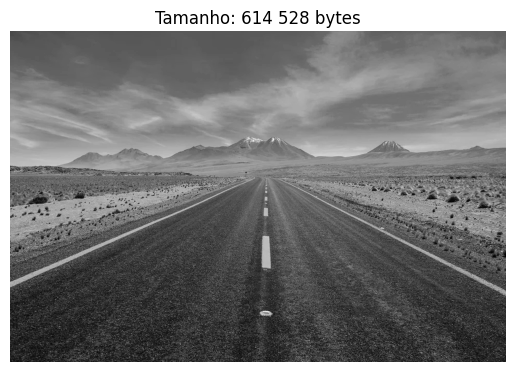


Imagem com PCA (50 Componentes Principais)



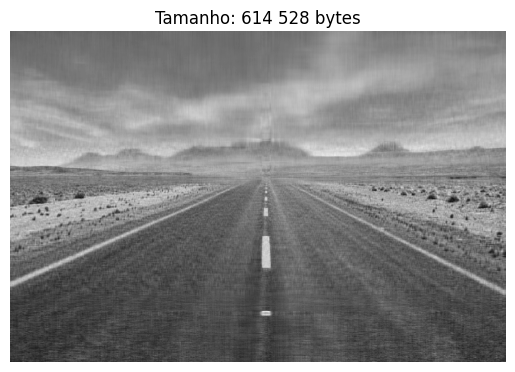

In [3]:
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

def pca_image_grayscale(image, num_components):
    mean_image = np.mean(image, axis=0)
    centered_image = image - mean_image

    cov_matrix = np.cov(centered_image, rowvar=False)

    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    reduced_image = np.dot(centered_image, eigenvector_subset)
    reconstructed_image = np.dot(reduced_image, eigenvector_subset.T) + mean_image

    reconstructed_image = reconstructed_image - np.min(reconstructed_image)
    reconstructed_image = reconstructed_image / np.max(reconstructed_image)
    reconstructed_image = (reconstructed_image * 255).astype(np.uint8)

    return reconstructed_image

image = load_image(image_url)
# URL da imagem
gray_image = convert_to_grayscale(image)

# Carregar a imagem

# Aplicar PCA
num_components = 50  # N√∫mero de componentes principais
pca_result = pca_image_grayscale(gray_image, num_components)

# Mostrar a imagem original e a imagem reduzida
print('Imagem em Escala de Cinza\n')
show_image(gray_image)
print(f'\nImagem com PCA ({num_components} Componentes Principais)\n')
show_image(pca_result)

Podemos ver que ap√≥s a aplica√ß√£o da t√©cnica de PCA, a imagem continuou com a mesma quantidade de Bytes mas possui menos componentes. Vamos ver qual t√©cnica se sai melhor para o treinamento de IAs.

## Treinando modelos
Vamos fazer as importa√ß√µes necess√°rias

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from google.colab import drive
import os
import time

Carregar o dataset do drive

In [22]:
drive.mount('/content/drive/')

root = "/content/drive/MyDrive/DimensionalityReduction/Sign-language-digits-dataset"

X = np.load(f'{root}/X.npy')
Y = np.load(f'{root}/Y.npy')

print(len(X))
print(len(Y))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
2062
2062


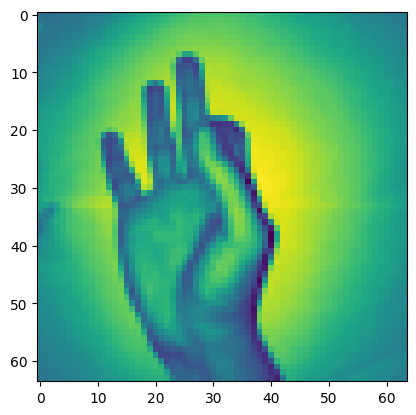

In [6]:
plt.imshow(X[0])

### Sem pr√©-processamento
Primeiro, vamos ver como um modelo se sai sem o pr√©-processamento das imagens. Vamos usar o MLPClassifier (Multi-Layer Perceptron Classifier) que √© um modelo de rede neural artificial usado para classifica√ß√£o.

Vamos arrumar o array para que possa ser usado pelo modelo e separar os dados para treinamento e para teste.

In [7]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

E vamos treinar o modelo.

In [8]:
start_time = time.time()
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)
training_time = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
y_hat = clf.predict(X_test)

print(f"tempo de treinamento: {training_time:,.4f} segundos")
print("acur√°cia: " + str(accuracy_score(y_test, y_hat)))

tempo de treinamento: 13.7197 segundos
acur√°cia: 0.3392568659127625


### Aplicando a escala de cinza
Agora vamos ver como o modelo se sai ao aplicarmos a escala de cinza √†s imagens.

Vamos aplicar a escala de cinza no dataset, arrumar os dados para que possam ser usados pelo modelo e separa-los para treino e teste.

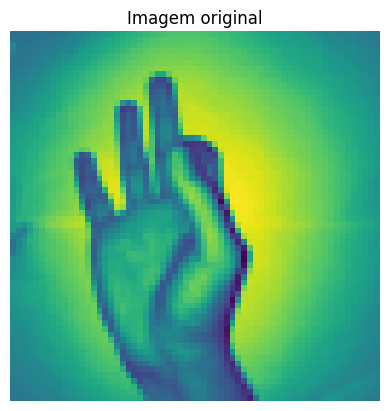

Tempo de convers√£o para escala de cinza: 0.02 segundos
Primeira imagem em escala de cinza (valores m√≠nimos e m√°ximos): 0.19215687 0.96862745


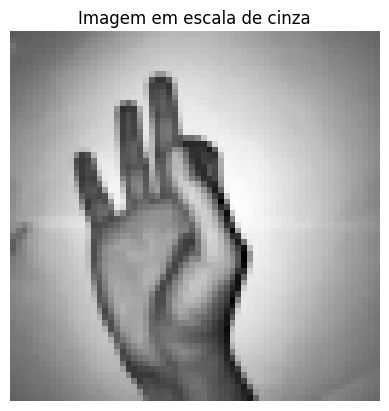

Tempo de treinamento com imagens em escala de cinza: 7.57 segundos
Acur√°cia com imagens em escala de cinza: 0.6639741518578353


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Fun√ß√£o para converter imagem para escala de cinza usando NumPy para otimiza√ß√£o
def convert_to_grayscale(image):
    if image.ndim == 3 and image.shape[2] == 3:  # Verifica se a imagem tem 3 canais de cor (RGB)
        # Normaliza os valores para o intervalo 0-1, faz a convers√£o e depois volta para o intervalo 0-255
        image = image / 255.0
        gray_image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
        return (gray_image * 255).astype(np.uint8)  # Retorna a imagem convertida para escala de cinza
    else:
        return image  # Se a imagem j√° est√° em escala de cinza, retorna como est√°

# Fun√ß√£o para mostrar a imagem
def show_image(image_array, title=''):
    plt.imshow(image_array, cmap='gray')  # Usa o cmap 'gray' para exibir a imagem em escala de cinza
    plt.title(title)
    plt.axis('off')
    plt.show()

# Carregar o dataset
root = "/content/drive/MyDrive/DimensionalityReduction/Sign-language-digits-dataset"
X = np.load(f'{root}/X.npy')
Y = np.load(f'{root}/Y.npy')

plt.imshow(X[0])
plt.title('Imagem original')
plt.axis('off')
plt.show()

# Converter cada imagem para escala de cinza
start_time = time.time()
X_gray = np.array([convert_to_grayscale(img) for img in X])
gray_conversion_time = time.time() - start_time
print(f"Tempo de convers√£o para escala de cinza: {gray_conversion_time:.2f} segundos")

# Verificar se as imagens em escala de cinza t√™m valores no intervalo esperado
print("Primeira imagem em escala de cinza (valores m√≠nimos e m√°ximos):", np.min(X_gray[0]), np.max(X_gray[0]))

show_image(X_gray[0], title='Imagem em escala de cinza')

# Flatten as imagens para usar como entrada no modelo MLP
X_flat_gray = X_gray.reshape((X_gray.shape[0], -1))

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_flat_gray, Y, test_size=0.3, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cronometrar o treinamento com imagens em escala de cinza
start_time = time.time()
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter=500)
clf.fit(X_train, y_train)
gray_training_time = time.time() - start_time
print(f"Tempo de treinamento com imagens em escala de cinza: {gray_training_time:.2f} segundos")

# Fazer previs√µes e calcular a acur√°cia
y_hat = clf.predict(X_test)
print("Acur√°cia com imagens em escala de cinza: " + str(accuracy_score(y_test, y_hat)))

In [11]:
# Converter cada imagem para escala de cinza
X_gray = np.array([convert_to_grayscale(img) for img in X])

# Flatten as imagens para usar como entrada no modelo MLP
X_flat_gray = X_gray.reshape((X_gray.shape[0], -1))

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_flat_gray, Y, test_size=0.3, random_state=42)

Escalar os dados.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Treinar o modelo.

In [13]:
start_time = time.time()
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter=500)
clf.fit(X_train, y_train)
gray_training_time = time.time() - start_time
print(f"Tempo de treinamento com imagens em escala de cinza: {gray_training_time:.2f} segundos")
# Fazer previs√µes e calcular a acur√°cia
y_hat = clf.predict(X_test)
print("Acur√°cia com imagens em escala de cinza: " + str(accuracy_score(y_test, y_hat)))

Tempo de treinamento com imagens em escala de cinza: 8.25 segundos
Acur√°cia com imagens em escala de cinza: 0.6413570274636511


### Aplicando o m√©todo PCA
Agora vamos ver como o modelo se sai usando a t√©cnica de PCA.

Vamos fazer as importa√ß√µes necess√°rias.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Vamos aplicar a fun√ß√£o para as imagens do dataset.

Imagem original



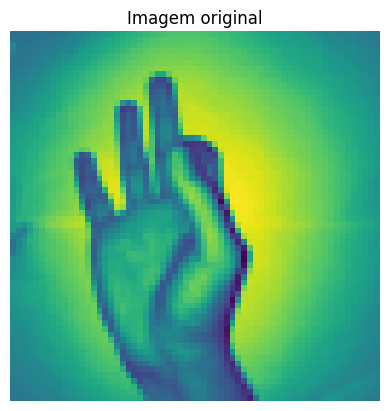


Imagem com PCA (50 Componentes Principais)



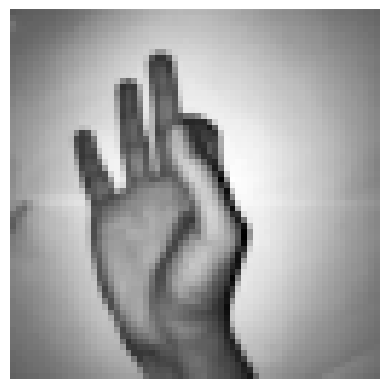

In [15]:
# Aplicar PCA a cada imagem no dataset
num_components = 50  # Defina o n√∫mero de componentes principais desejado
X_pca = np.array([pca_image_grayscale(img, num_components) for img in X])

print('Imagem original\n')
plt.imshow(X[0])
plt.title('Imagem original')
plt.axis('off')
plt.show()

print(f'\nImagem com PCA ({num_components} Componentes Principais)\n')
show_image(X_pca[0])


Assim como antes, vamos ajustar os dados para que possam ser usados pelo modelo e separa-los para treino e para teste.

In [16]:
# Flatten as imagens para usar como entrada no modelo MLP
X_flat_pca = X_pca.reshape((X_pca.shape[0], -1))

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_flat_pca, Y, test_size=0.3, random_state=42)

Vamos escalar os dados para padroniza-los.

In [17]:
# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

E, finalmente, vamos treinar o modelo.

In [21]:
start_time = time.time()
# Treinar o modelo MLP com os dados reduzidos pelo PCA
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), max_iter=500)
clf_reduced.fit(X_train, y_train)
pca_training_time = time.time() - start_time

# Fazer previs√µes
y_hat_reduced = clf_reduced.predict(X_test)

# Calcular a acur√°cia
print(f"tempo de treinamento: {pca_training_time:,.4f} segundos")
print("acur√°cia: " + str(accuracy_score(y_test, y_hat_reduced)))

tempo de treinamento: 23.2667 segundos
acur√°cia: 0.6397415185783522


## Conclus√£o

|<p align="center">T√©cnica</p>|<p align="center">Tempo de Treinamento (s)</p>|<p align="center">Acur√°cia</p>|
|----------------------------------------|-----------------------------------------------|--------------------------------|
| <p align="center">Sem pr√©-processamento</p> | <p align="center">11.9561</p>               | <p align="center">0.3392568659127625</p> |
| <p align="center">Com escala de cinza</p>  | <p align="center">7.57</p>                  | <p align="center">0.6639741518578353</p> |
| <p align="center">Com PCA</p>          | <p align="center">23.2667</p>                | <p align="center">0.6397415185783522</p> |

<br>

Com base nos resultados apresentados, podemos concluir que a aplica√ß√£o de t√©cnicas de pr√©-processamento, como a convers√£o para escala de cinza e a An√°lise de Componentes Principais (PCA), impacta significativamente tanto o tempo de treinamento quanto a acur√°cia do modelo. Enquanto a t√©cnica de PCA possa se sair muito bem em outros cen√°rios, nesse estudo, conclui-se que a melhor t√©cnica foi a de escala de cinza, que al√©m de obter a maior acur√°cia tamb√©m teve o menor tempo de treinamento.

Estes resultados sugerem que o pr√©-processamento das imagens com certeza melhora a efici√™ncia e a precis√£o dos modelos de aprendizagem de m√°quina, mas a escolha da t√©cnica deve considerar o contexto em que esse pr√©-processamento dos dados est√° sendo feito.

## Refer√™ncias
* [O que √© a Redu√ß√£o de Dimensionalidade em Machine Learning?](https://ealexbarros.medium.com/o-que-%C3%A9-a-redu%C3%A7%C3%A3o-de-dimensionalidade-em-machine-learning-cc2a89e3cdec)

* [Preprocessing images with dimensionality reduction](https://www.kaggle.com/code/hamishdickson/preprocessing-images-with-dimensionality-reduction/notebook)